Stationary stochastic processes,<br>
Lund University, <br>
Centre for Mathematical Sciences HT 2024, <br>
Mathematical Statistics

# Computer exercise 1 (Ladok-Lab 1)

In this computer exercise you will study estimation of expected value, covariance function and
spectral density for some process realizations. You will also study and compare the frequency
content from recordings of different music instruments.
***
* Please find all the additional files and data on the course webpage and download these into
your computer. **Remember to save your commands and code in scripts for
easier access of the results at the presentation. Please also comment well.**
* Please work in groups of two students!
***


In [2]:
# Import necessary libraries for the entire exercise.
import numpy as np
import matplotlib.pyplot as plt
import scipy.io 
import scipy.signal
import sounddevice as sd
# import pandas as pd

from help_funcs_SSP import signalsim, getCov, melSpectrogram, melFil

plt.close('all') 

## 1 Introduction to estimation of expected value, covariance function and spectral density
Expected value, covariance function and spectral density are central concepts for modelling
of stationary stochastic processes. In general, the modelling starts from measured data and
therefore, we need to learn how to estimate these concepts from data.
### 1.1 Estimation of expected value
Load the file data.mat using the command load data. The file contains three realizations,
each of 100 samples of Gaussian white noise.

In [3]:
# Load the data (You can use this way the entire course)
path_to_data = "data.mat" # Change to YOUR path to data.
data = scipy.io.loadmat(path_to_data,simplify_cells=True)
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'data1', 'data2', 'data3'])


Plot the sequences,

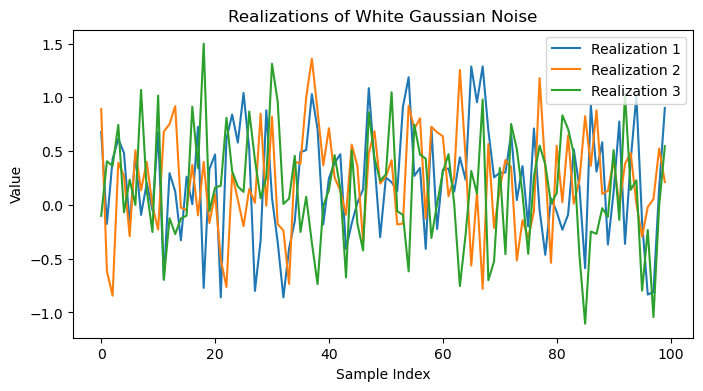

In [4]:
# Plot the sequences
plt.figure(figsize=(8, 4))
plt.plot(data["data1"], label='Realization 1')
plt.plot(data["data2"], label='Realization 2')
plt.plot(data["data3"], label='Realization 3')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Realizations of White Gaussian Noise')
plt.legend()
plt.show()

***Q1. What conclusions can you make from this figure? Is it reasonable to assume
that all realizations are from the same stationary stochastic process? Does this
process have zero mean?***

Estimate the three expected values

**Ans** The realizations seem to vary around the same mean and have approximately the same variation. It is possible that the realizations can be from the same process.

In [5]:
np.set_printoptions(precision=3)
m1 = np.mean(data["data1"],axis=0)

# Write your own code below:
m2 = np.mean(data["data2"], axis=0)
m3 = np.mean(data["data3"], axis=0)


m1, m2, m3

(0.22123851688310914, 0.22602266348623273, 0.1529905593667037)

Now, derive 95 % confidence intervals of all your expected
value estimates, using the knowledge that the variance is 0.25 in all cases.

In [6]:
# Write your code here.
var = 0.25
l_025 = 1.96

conf_m1 = [m1 - l_025 * np.sqrt(var) / np.sqrt(len(data["data1"])), m1 + l_025 * np.sqrt(var) / np.sqrt(len(data["data1"]))]
conf_m2 = [m2 - l_025 * np.sqrt(var) / np.sqrt(len(data["data1"])), m2 + l_025 * np.sqrt(var) / np.sqrt(len(data["data1"]))]
conf_m3 = [m3 - l_025 * np.sqrt(var) / np.sqrt(len(data["data1"])), m3 + l_025 * np.sqrt(var) / np.sqrt(len(data["data1"]))]


print(conf_m1, conf_m2, conf_m3)

[0.12323851688310913, 0.3192385168831091] [0.12802266348623273, 0.32402266348623276] [0.05499055936670369, 0.25099055936670367]


In [7]:
len(data["data1"])

100

***Q2. Viewing the three confidence intervals, can you say that none, some or all
of the underlying processes have zero-mean?***

**Ans** None of the underlying processes have zero mean with a significance level of 95 % since none of the intervals includes zero.

Use the knowledge (or assumption) that all the realizations actually come from the same
process. Compute a more reliable estimate of the expected value of the process.

In [8]:
# Write your code here.
# The summation of data because more datapoints generate a smaller interval.
data_sum = 1/3 * (data["data1"] + data["data2"] + data["data3"])

x_hat = np.mean(data_sum)
x_hat

0.20008391324534852

***Q3. What is your final estimated expected value of the white noise process?***

**Ans Q3:** The final value is 0.20

### 1.2 Estimation of covariance function

Load the file data2 which contains a realization of an unknown process as the variable y. 
Estimate and plot the covariance function using `getCov(x,max_lag,"r")`!

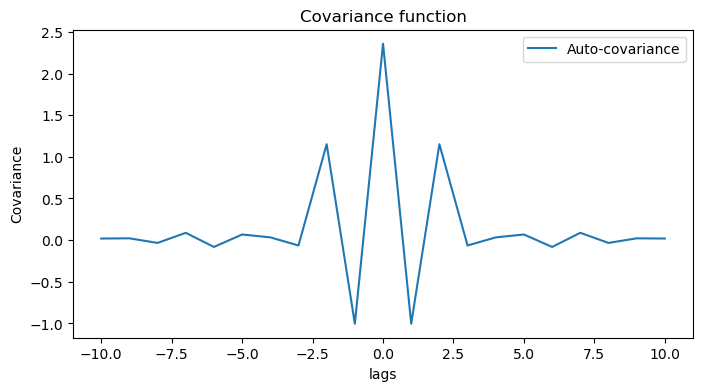

In [9]:
# Input code for loading 'data2.mat'
path_to_data = "data2.mat" # Change to YOUR path to data.
data = scipy.io.loadmat(path_to_data,simplify_cells=True)

max_lag = 10
r, lags = getCov(data["y"],max_lag,"r")

plt.figure(figsize=(8, 4))
plt.plot(lags,r, label='Auto-covariance')
plt.xlabel('lags')
plt.ylabel('Covariance')
plt.title('Covariance function')
plt.legend()
plt.show()

In a new figure, plot the correlation function using `getCov(x,max_lag,"rho")`,

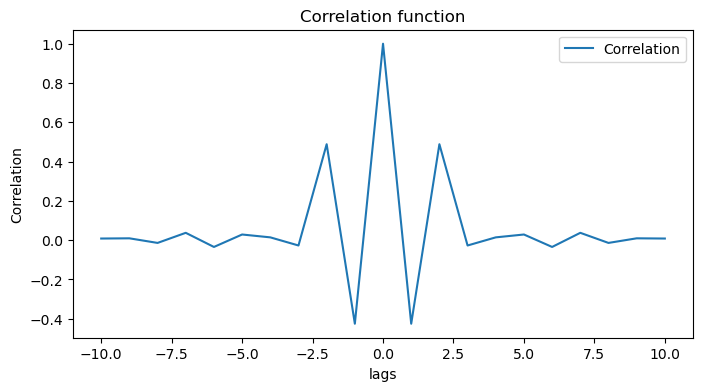

In [10]:
rho, lags = getCov(data["y"],max_lag,"rho")
plt.figure(figsize=(8, 4))
plt.plot(lags,rho, label='Correlation')
plt.xlabel('lags')
plt.ylabel('Correlation')
plt.title('Correlation function')
plt.legend()
plt.show()

In [11]:
# The Variance of the 
r/rho

array([2.359, 2.359, 2.359, 2.359, 2.359, 2.359, 2.359, 2.359, 2.359,
       2.359, 2.359, 2.359, 2.359, 2.359, 2.359, 2.359, 2.359, 2.359,
       2.359, 2.359, 2.359])

Verify the correspondence between the covariance and correlation functions by comparing the
values in the two plotted curves.<br>

***Q4. What is the connection written as a formula?*** <br>

$$
\rho = \frac{C[X, Y]}{\sqrt{[V[X]V[Y]}}
$$


In a new figure, plot all possible values of y(t) and y(t-k) against each other in a `plt.scatter`-plot for different values of k, e.g.

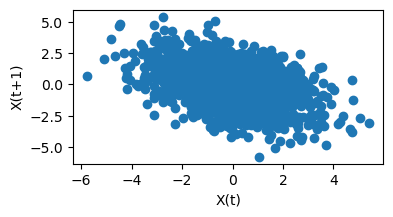

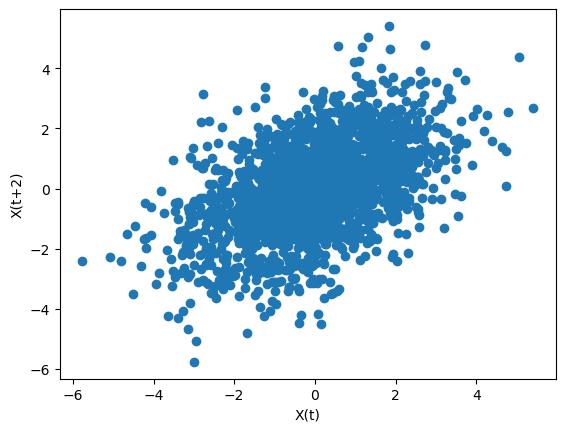

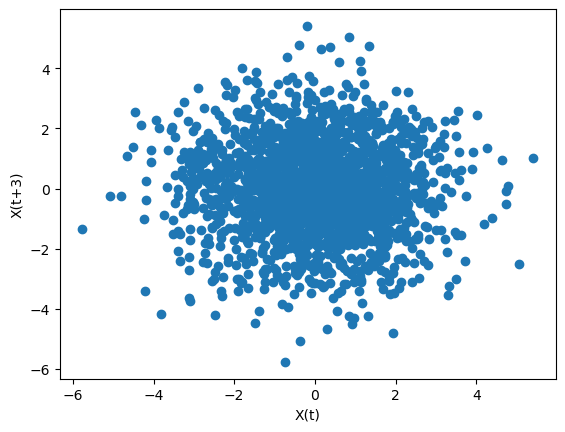

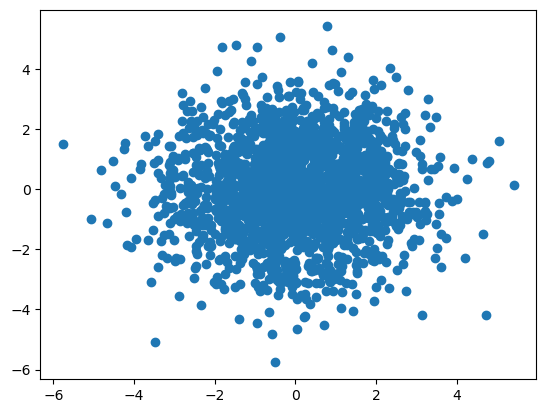

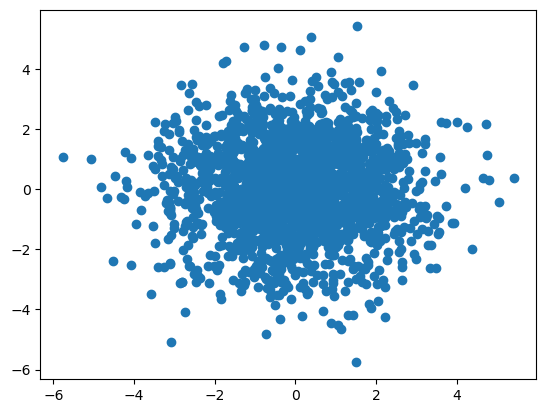

In [12]:
k = 1 # sets the lag
plt.figure(figsize=(4, 2))
plt.scatter(data["y"][:-k],data["y"][k:], label='Realization 1')
plt.xlabel("X(t)")
plt.ylabel(f"X(t+{k})")
plt.show()

# Write your own code below:
k = 2 #...
plt.scatter(data["y"][:-k], data["y"][k:], label='Realization 2')
plt.xlabel("X(t)")
plt.ylabel(f"X(t+{k})")
plt.show()

k = 3 #...
plt.scatter(data["y"][:-k], data["y"][k:], label='Realization 3')
plt.xlabel("X(t)")
plt.ylabel(f"X(t+{k})")
plt.show()

k = 4 #...
plt.scatter(data["y"][:-k], data["y"][k:], label='Realization 4')
plt.show()

k = 20 #...
plt.scatter(data["y"][:-k], data["y"][k:], label='Realization 20')
plt.show()

The figures plot the realization X(t) on the x axis and realization X(t+k) on the y-axis. 
The positive slope of the covariance plots indicate a positive correlation between the values including the time lag k. With k = 2 we can see that there is a negative correlation meaning the polarity of the values switches between the measured values. For k = 3 we see no correlation between the data points. 

Compare with the resulting figures if you change to k=2 and k=3 (in new figures). <br><br>
***Q5. Explain how the view in the scatter plots relate to the values in the correlation
function.***

The figures plot the realization X(t) on the x axis and realization X(t+k) on the y-axis. 
The positive slope of the covariance plots indicate a positive correlation between the values including the time lag k. With k = 2 we can see that there is a negative correlation meaning the polarity of the values switches between the measured values. For k = 3 we see no correlation between the data points. 

### 1.3 Estimation of Spectral Density

The function `signalsim()` simulates one realization of a Gaussian stationary harmonic process according to

\begin{equation*}
x(n)=A_1\cos(2\pi\frac{f_1}{fs}n+\phi_1)+A_2\cos(2\pi\frac{f_2}{fs}n+\phi_2), \;\;\; n=0 \ldots N-1,
\end{equation*}
with 
frequencies $f_k=\{10,20\}$ Hz, number of samples $N=500$ and sample frequency $fs=256$ Hz. The independent phases are $\phi_k \in Rect(0,2 \pi)$ and the independent amplitudes are $A_k \in \text{Rayleigh}(\sigma_k)$ with parameters $\sigma_k=\{2,2\}$. 

Code and plot a simulated realization of the above process corresponding to a timescale in seconds, or run the function `signalsim`.

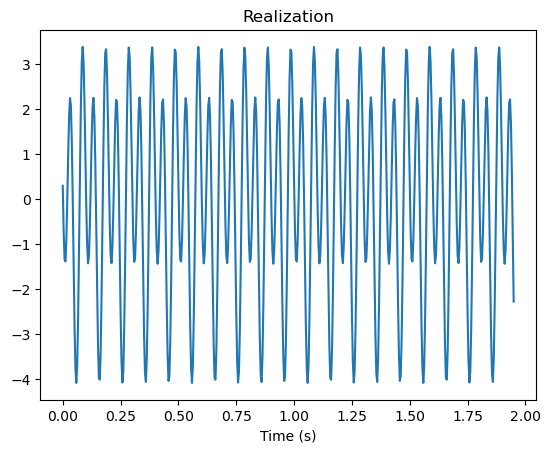

In [15]:
# Use following to lines...: 
x, t = signalsim()
# ... Or create your own method of simulating the process above:

# Visualize the realization
plt.plot(t, x)
plt.xlabel('Time (s)')
plt.title('Realization')
plt.show()

***Q6. What is the connection between the maximum time-value in seconds,   number of samples N and the sampling frequency fs in Hz?***

Estimate and view the covariance function  for an appropriate `max_lag` and plot the resulting function. Let the  x-scale be lag-values expressed in seconds!

**Ans Q6** <br>
The function is 
$$
fs = \frac{N}{t_{max}}
$$

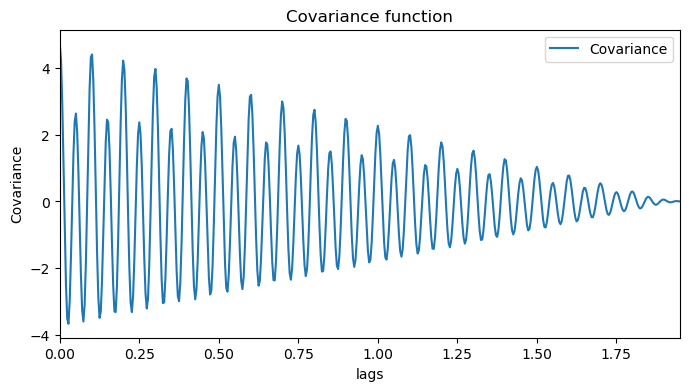

In [17]:
# Write your own code below.
r, lags = getCov(x, 500, "r")

plt.figure(figsize=(8, 4))
plt.plot(lags/256, r, label='Covariance')
plt.xlabel('lags')
plt.ylabel('Covariance')
plt.title('Covariance function')
plt.legend()

plt.xlim([0, lags[-1]/256])
plt.show()


Yes they match. 

***Q7. Do the periodicities of the realization and covariance function match each other?***
	
If your answer is no, you have made a mistake in your calculation of the lag-scale (or the timescale)!	 

Estimate the spectral density  with the periodogram, at $NFFT=2048$ frequency values, and plot the resulting periodogram with $f$ as the x-scale. 

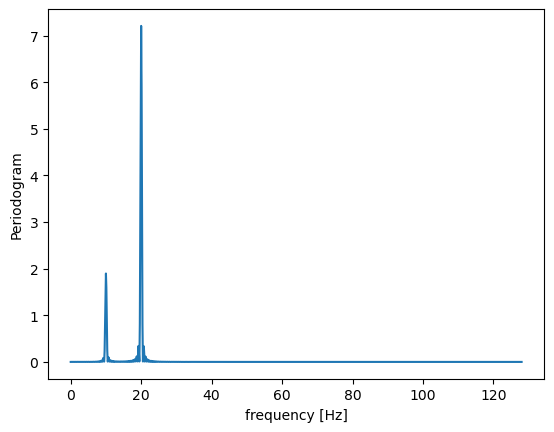

In [19]:
fs = 256
nfft = 2048

f,P = scipy.signal.periodogram(x,fs=fs,nfft=nfft)

plt.plot(f,P)
plt.xlabel('frequency [Hz]')
plt.ylabel('Periodogram')
plt.show()

**Ans Q8** The frequency of the peaks relate to the periodicity according to f = 1/T, we see for example two frequencies here for the two different periods T = 0.05 and 0.1

***Q8. How does the frequency of the peaks relate to the periodicity of the realization (and covariance function)?***

Study the peak heights of the two frequencies shown in the periodogram.


***Q9. Why are the heights of the periodogram peaks different from each other?***

Run your code or the `signalsim` again to view a new simulated realization. Compute and plot the periodogram. Repeat the procedure of simulating a new realization and plotting the periodogram a couple of times. Sometimes the resulting periodogram seems to contain just one frequency. Choose one such case and study the periodogram in a new figure by changing the y-scale to decibel (dB)

Because they have different ampltitude and the y-axis of a periodogram represents power, E[A^2]

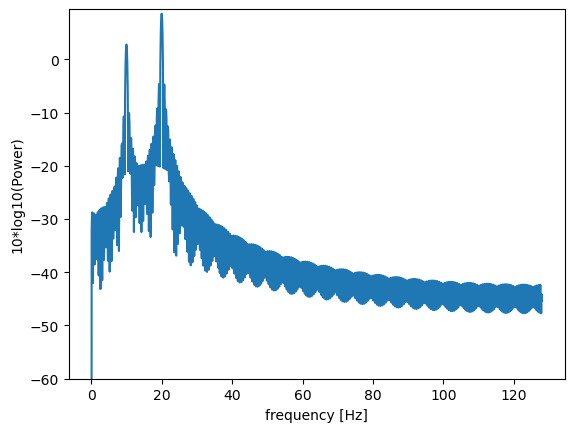

In [20]:
plt.plot(f,10*np.log10(P))
plt.xlabel('frequency [Hz]')
plt.ylabel('10*log10(Power)')
plt.ylim([-60,np.max(10*np.log10(P))*1.1])
plt.show()

Compare the two different ways of visualizing the periodogram.

***Q10. What is the advantage of using the dB-scale?***

**Ans 10** Man ser undertoner som inte syns så tydligt i frekvensdiagrammet. I och med att man logaritmerar y-skalan så smetas frekvenserna ut mer och undertonerna som har lägre power syns tydligare

## 2 Instruments in a symphony orchestra

The sound from an acoustic instrument consists of a fundamental frequency, often termed a keynote, and some overtones or harmonics. The phases of the overtones typically depend on the instrument and are partly correlated with the oscillation of the keynote. This, together with the relation between the power of the overtones, produces the perceived sound of the instrument. If the keynote has frequency $f_0$,  the frequencies of the overtones will depend on the type of instrument. For string instruments, the overtones can be well represented as $f_k = k f_0$, $k=1, 2, \ldots$
The  examples used in this exercise are recorded by the Philharmonia musicians, and are just a few examples of many, found at their webpage https://philharmonia.co.uk/resources/sound-samples/.

### 2.1 Keynotes and overtones

Download and load the file `cellodiffA.mat`, where you find three variables, `celloA2`, `celloA3` and `celloA4`, each representing a recording of the note A. The sampling frequency is $fs=44100$ Hz.  Listen to the tones by using the command `sd.play(data, fs)` Note: if the correct sampling frequency is not given as an input parameter, this will result in a strange sound!  

**Estimate the corresponding spectral densities using the periodogram with dB-scale and compare the keynote and overtones frequencies for the three cases!**

Use `%matplotlib qt` and `%matplotlib inline` to switch showing plots in interactive windows and inline respectively (inline is default as you probably have noticed).

In [21]:
%matplotlib qt

path_data = "cellodiffA.mat"
data_cello = scipy.io.loadmat(path_data,simplify_cells=True)

fs = 44100
nfft = 2048
sd.play(data_cello["celloA2"], fs)

# Write your code below.

f2,P2 = scipy.signal.periodogram(data_cello["celloA2"],fs=fs,nfft=nfft)
f3,P3 = scipy.signal.periodogram(data_cello["celloA3"],fs=fs,nfft=nfft)
f4,P4 = scipy.signal.periodogram(data_cello["celloA4"],fs=fs,nfft=nfft)

plt.figure()
plt.plot(f2,10*np.log10(P2))
plt.xlabel('frequency [Hz]')
plt.ylabel('10*log10(Power)')
#plt.ylim([-60,np.max(10*np.log10(P2))*1.1])
plt.show()

plt.figure()
plt.plot(f3,10*np.log10(P3))
plt.xlabel('frequency [Hz]')
plt.ylabel('10*log10(Power)')
#plt.ylim([-60,np.max(10*np.log10(P2))*1.1])
plt.show()

plt.figure()
plt.plot(f4,10*np.log10(P4))
plt.xlabel('frequency [Hz]')
plt.ylabel('10*log10(Power)')
#plt.ylim([-60,np.max(10*np.log10(P2))*1.1])
plt.show()




C:\Users\Vidar1\AppData\Local\Temp\ipykernel_17028\1009304219.py:17: RuntimeWarning: divide by zero encountered in log10
  plt.plot(f2,10*np.log10(P2))
C:\Users\Vidar1\AppData\Local\Temp\ipykernel_17028\1009304219.py:24: RuntimeWarning: divide by zero encountered in log10
  plt.plot(f3,10*np.log10(P3))
C:\Users\Vidar1\AppData\Local\Temp\ipykernel_17028\1009304219.py:31: RuntimeWarning: divide by zero encountered in log10
  plt.plot(f4,10*np.log10(P4))


In [22]:
# Max of frequencies
P2_dB = 10*np.log10(P2)
P3_dB = 10*np.log10(P3)
P4_dB = 10*np.log10(P4)

idx2 = list(P2_dB).index(max(P2_dB))
idx3 = list(P3_dB).index(max(P3_dB))
idx4 = list(P4_dB).index(max(P4_dB))

f2[idx2], f3[idx3], f4[idx4]



C:\Users\Vidar1\AppData\Local\Temp\ipykernel_17028\1097925834.py:2: RuntimeWarning: divide by zero encountered in log10
  P2_dB = 10*np.log10(P2)
C:\Users\Vidar1\AppData\Local\Temp\ipykernel_17028\1097925834.py:3: RuntimeWarning: divide by zero encountered in log10
  P3_dB = 10*np.log10(P3)
C:\Users\Vidar1\AppData\Local\Temp\ipykernel_17028\1097925834.py:4: RuntimeWarning: divide by zero encountered in log10
  P4_dB = 10*np.log10(P4)


(322.998046875, 430.6640625, 882.861328125)

In [23]:
f2[P2_dB > -50], P2_dB[P2_dB > - 50]

(array([107.666, 215.332, 322.998]), array([-47.142, -48.291, -46.697]))

In [24]:
f3[P3_dB > -65], P3_dB[P3_dB > - 50]


(array([ 215.332,  236.865,  387.598,  409.131,  430.664,  452.197,
         473.73 ,  667.529,  861.328,  882.861, 1313.525, 1959.521,
        1981.055, 2174.854, 2196.387, 2411.719]),
 array([-48.802]))

In [25]:
f4[P4_dB > -55], P4_dB[P4_dB > - 55]

(array([ 882.861, 1765.723, 2196.387, 2217.92 ]),
 array([-47.935, -52.25 , -51.454, -52.293]))

In [26]:
# sd.play(data_cello["celloA2"], fs)
# sd.play(data_cello["celloA3"], fs)
# sd.play(data_cello["celloA4"], fs)

**Ans Q11** The keynote seem to be 107.115 and has overtones 215.332, 430,664 and 882.861. Matches pretty good with the describe method of 
$$
f_0, f_1 = f_0 \cdot k , f_k = f_0 \cdot k + 1 \dots
$$

***Q11. What are the keynotes and overtones in the three cases and how do the frequencies of the three different A relate to what you hear? Does the frequency structure match the simple overtone-model described above?***

## Cello and flute

In the previous exercise, the extraction of frequencies from the different sounds could be a winning strategy to differ or classify these sounds. If we instead listen to two different instruments playing exactly the same note A, it is much more difficult to differ them. Download the file `celloandflute.mat`, where you find two examples of the cello-tone A and two examples of the flute-tone A.  Listen to the sounds!

**Study the periodograms of all four cases!**

In [27]:
nfft = 2048
fs = 44100
path = "celloandflute.mat"
data_cello_flute = scipy.io.loadmat(path, simplify_cells = True)

sd.play(data_cello_flute["celloA41"], fs)

In [28]:
sd.play(data_cello_flute["celloA42"], fs)

In [89]:
sd.play(data_cello_flute["fluteA41"], fs)

In [90]:
sd.play(data_cello_flute["fluteA42"])

In [94]:
# Write your code below.
%matplotlib qt
import time 



f_c1, P_c1 = scipy.signal.periodogram(data_cello_flute["celloA41"],fs=fs,nfft=nfft)
f_c2, P_c2 = scipy.signal.periodogram(data_cello_flute["celloA42"],fs=fs,nfft=nfft)
f_f1,P_f1 = scipy.signal.periodogram(data_cello_flute["fluteA41"],fs=fs,nfft=nfft)
f_f2,P_f2 = scipy.signal.periodogram(data_cello_flute["fluteA42"],fs=fs,nfft=nfft)


plt.plot(f_c1,P_c1)
plt.xlabel('frequency [Hz]')
plt.ylabel('Periodogram')
plt.title("CelloA41")
plt.show()

plt.figure()

plt.plot(f_c2,P_c2)
plt.xlabel('frequency [Hz]')
plt.ylabel('Periodogram')
plt.title("CelloA42")
plt.show()

plt.figure()

plt.plot(f_f1,P_f1)
plt.xlabel('frequency [Hz]')
plt.ylabel('Periodogram')
plt.title("FluteA41")
plt.show()

plt.figure()

plt.plot(f_f2,P_f2)
plt.xlabel('frequency [Hz]')
plt.ylabel('Periodogram')
plt.title("FluteA42")
plt.show()


In [93]:
plt.close("all")

In [33]:
sd.play(data_cello_flute["celloA41"], fs)

In [34]:
sd.play(data_cello_flute["celloA42"], fs)

In [35]:
sd.play(data_cello_flute["fluteA41"], fs)

In [36]:
sd.play(data_cello_flute["fluteA42"], fs)

***Q12. What differences do you see in the periodograms between the two instruments? Suggest some relevant features to be extracted from periodogram structure that could be used to differ the two instruments.***

**Ans Q12** There are more overtones present in the cello recording. The exact overtones could be relevant to see how they differ from each other. 

### 2.3 The spectrogram

 Download the file cellomelody.m, where you find two examples of sequences played at the cello, `melody1` and `melody2`. Listen to both sequences. Can you hear the difference between them so you are able to identify them? 
 
 As the sequences are now time-varying, we use the spectrogram to visualize a number of stacked periodograms. Choose  a window length (also is the sequence length of a periodogram) as  $window=2048$, which is around 46 ms.  Also choose the stacked periodograms to be calculated from somewhat overlapping data sequences, here the number of overlapping samples are chosen as $noverlap=1024$. **The parameter $noverlap$ can be chosen from zero (no overlap) and as large as $window-1$**.  With no overlap the calculation time is reduced, but the resulting spectrogram time resolution will also be blurred. A large number of overlapping samples is computationally heavy  although a nice view of the spectrogram is given. Finally, the number of frequency values must be at least equal to the window length, but is often much larger, e.g. here we choose $NFFT=16384$. **Compute and plot the spectrograms with**


In [37]:
data = scipy.io.loadmat("cellomelody.mat")

In [38]:
# 1) Load data
# Write your own code below.
data = scipy.io.loadmat("cellomelody.mat", simplify_cells=True)
melody1 = data["melody1"]
melody2 = data["melody2"]


# 2) Set your parameters.
fs = data["fs"]

sd.play(melody1, fs)

In [39]:
sd.play(melody2, fs)

In [40]:
# Set parameters
fs = data["fs"]
noverlap = 1024
nfft = 16384
window = 2048

plt.close("all")
# Calculate Spectrogram
f1, t1, S1 = scipy.signal.spectrogram(melody1, fs=fs, noverlap=noverlap, window='hann', nperseg=window,nfft=nfft)
plt.figure()
plt.pcolormesh(t1, f1, 10*np.log10(S1))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title(f"melody1 \n noverlap = {noverlap}, window = {window}, nfft = {nfft}")
plt.show()

f2, t2, S2 = scipy.signal.spectrogram(melody2, fs=fs, noverlap=noverlap, window='hann', nperseg=window,nfft=nfft)
plt.figure()
plt.pcolormesh(t2, f2, 10*np.log10(S2))
plt.title(f"melody2 \n noverlap = {noverlap}, window = {window}, nfft = {nfft}")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

The x-axis represents time in seconds and the y-axis is the frequencies in kHz. The colours of the image show the power according to the colour bar. Read documentation on `scipy.signal.spectrogram` for more information. Visualize both sequences and compare the images. Try to identify which spectrogram that belongs to `melody1` and `melody2` respectively just by listening and viewing an image.  Zoom in for frequencies below 2 kHz for a better view of the keynotes! Use `%matplotlib qt` and `%matplotlib inline` to switch showing plots in interactive windows and inline (inline is default as you probably have noticed).

***Q13. Can you differ the two sequences by listening and also identify differences of the two melodies in the spectrograms? Describe in words and point out the features in your images you rely on.***

Change the input parameter, $window$ and also change the parameter $noverlap$, see description above. View the spectrograms using a much longer window and also a much shorter window.

In [41]:
# Set parameters
fs = data["fs"]
noverlap = 8196
nfft = 16384
window = 16384

plt.close("all")
# Calculate Spectrogram
f1, t1, S1 = scipy.signal.spectrogram(melody1, fs=fs, noverlap=noverlap, window='hann', nperseg=window,nfft=nfft)
plt.figure()
plt.pcolormesh(t1, f1, 10*np.log10(S1))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title(f"melody1 \n noverlap = {noverlap}, window = {window}, nfft = {nfft}")
plt.show()

f2, t2, S2 = scipy.signal.spectrogram(melody2, fs=fs, noverlap=noverlap, window='hann', nperseg=window,nfft=nfft)
plt.figure()
plt.pcolormesh(t2, f2, 10*np.log10(S2))
plt.title(f"melody2 \n noverlap = {noverlap}, window = {window}, nfft = {nfft}")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [42]:
# Set parameters
fs = data["fs"]
noverlap = 216
nfft = 16384
window = 512

plt.close("all")
# Calculate Spectrogram
f1, t1, S1 = scipy.signal.spectrogram(melody1, fs=fs, noverlap=noverlap, window='hann', nperseg=window,nfft=nfft)
plt.figure()
plt.pcolormesh(t1, f1, 10*np.log10(S1))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title(f"melody1 \n noverlap = {noverlap}, window = {window}, nfft = {nfft}")
plt.show()

f2, t2, S2 = scipy.signal.spectrogram(melody2, fs=fs, noverlap=noverlap, window='hann', nperseg=window,nfft=nfft)
plt.figure()
plt.pcolormesh(t2, f2, 10*np.log10(S2))
plt.title(f"melody2 \n noverlap = {noverlap}, window = {window}, nfft = {nfft}")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

Applying longer window increases points per segment. 

***Q14. Describe the differences from the initial setup above when you apply longer or shorter windows.***

Another commonly used representation and visualization for audio signals is the mel spectrogram. The mel scale, named after the word melody, is a perceptual scale of pitch, where  fundamental frequencies are judged by listeners to be equal in distance from one another. The mel scale was invented almost 100 years ago and is subjective to human perception. And yet, this is the overall most applied algorithm for representation of audio time-frequency  images, when such images are used in machine learning classification. The main reason is the size reduction of the resulting so called mel spectrogram image. The x-axis has the same size as the spectrogram, but the y-axis will be represented with few values, the number of chosen mel filters, to be compared to the spectrogram where the size of the y-axis is found as $NFFT/2$. You can visualize the filterbank structure using $32$ mel filters with

In [43]:
fs, nfft

(44100, 16384)

In [44]:
h = melFil(fs,nfft)


The figure shows the shapes of the different mel filters in frequency, for frequencies up to $fs/2$.  Each filter will be used to calculate the weighted average of powers in the spectrogram, according to the filter shape, which will be represented at the center frequency value of the filter. For low frequencies, the filters are keeping a better frequency resolution as the bandwidths of these filters are more narrow. For higher frequencies, the bandwidths of the filters are wider and thereby several adjacent frequencies are averaged. The frequency resolution therefore is worse for higher frequencies. The final mel spectrogram powers is calculated for all different time values. For more information, read documentation on $melSpectrogram$. A mel spectrogram, using  $32$ mel filters, can be calculated as 

In [45]:
noverlap, nfft, fs

(216, 16384, 44100)

In [46]:
melSpectrogram(S1,fs,noverlap,nfft)

In [47]:
melSpectrogram(S2,fs,noverlap,nfft)


In [48]:
melSpectrogram(S2,fs,noverlap,nfft)

***Q15. Compare the mel spectrogram images of melody1 and melody2 and judge if you still can decide which image that belongs to which  strophe. Are there certain type of audio signals where the reduced frequency resolution of the mel spectrograms is disadvantageous in a classification task? Give examples.***

The mel diagram for the second melody is lacking more frequencies in the end of the melody. 

### 2.4 Decimation and aliasing

Similar to the exercise above, where you reduced the view to zoom in on the keynote for a proper identification, a down-sampling or decimation is often useful in analysis and modelling of oscillating data. Decimate  `melody1` by a factor $q=8$ with

In [49]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Aug 18 17:15:12 2022',
 '__version__': '1.0',
 '__globals__': [],
 'fs': 44100,
 'melody1': array([-9.155e-05,  3.052e-05,  9.155e-05, ...,  8.026e-02,  7.507e-02,
         6.989e-02]),
 'melody2': array([ 0.   ,  0.   ,  0.   , ..., -0.001,  0.004,  0.008])}

In [50]:
# 1) Decimation
q = 8
melody2dec = scipy.signal.decimate(melody2,q)
melody1dec = scipy.signal.decimate(melody1,q)

# 2) Playback
# Write your own code below.
#sd.play(melody2dec, fs/8)
sd.play(melody1dec, fs/8)



In [51]:
sd.play(melody1, fs)

Listen to the decimated sequence. Can you hear any differences from the original data? (The differences should be small and possible differences will depend on the quality of the loudspeaker.) Make sure you keep track of the new input sampling frequency to `sd.play(x,fs)`, so it matches the actual sampling rate of the data!

Use `scipy.signal.spectrogram` to visualize the original data and the decimated data in different figures. A better view of the decimated sequence will be given with use of a shorter window, as there now are fewer samples in each tone. E.g. use a window length of $512$ and an overlap of $256$ samples. Compare the spectrogram of the original and decimated data. 

In [52]:
# Write your own code below.
noverlap = 2048
nfft = 16384
window = 4096

# 3) Calculate Spectrogram
f_m2, t_m2, S_m2 = scipy.signal.spectrogram(melody2, fs=fs, noverlap=noverlap, window='hann', nperseg=window,nfft=nfft)
plt.figure()
plt.pcolormesh(t_m2, f_m2, 10*np.log10(S_m2))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title(f"melody2 \n noverlap = {noverlap}, window = {window}, nfft = {nfft}")
plt.show()

noverlap = 256
nfft = 16384
window = 512

f_dec2, t_dec2, S_dec2 = scipy.signal.spectrogram(melody2dec, fs=fs/8, noverlap=noverlap, window='hann', nperseg=window,nfft=nfft)
plt.figure()
plt.pcolormesh(t_dec2, f_dec2, 10*np.log10(S_dec2))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title(f"melody2 dec \n noverlap = {noverlap}, window = {window}, nfft = {nfft}")

plt.show()


***Q16. Are the keynote frequencies the same in the two images?***

If the answer of this question is no, you should check the used sampling frequencies!

The `decimate`-command starts with a low-pass filtering of the data followed by the decimation by picking samples from the filtered data with an interval corresponding to the decimation factor.  Use the following command to perform a decimation without the low-pass filter. Listen to this sequence and visualize with the spectrogram.

**Answer:** Yes the frequencies are the same. 

In [53]:
# 1) Downsampling
melody2alias=melody2[0:-1:q]
melody1alias=melody1[0:-1:q]

#2) Spectrogram
# Write your own code
noverlap = 256
nfft = 16384
window = 512

#2) Playback
# Write your own code
sd.play(melody2alias, fs/8)
# sd.play(melody1alias, fs/8)


# 3) Calculate Spectrogram
f_alias2, t_alias2, S_alias2 = scipy.signal.spectrogram(melody2alias, fs=fs/8, noverlap=noverlap, window='hann', nperseg=window,nfft=nfft)
f_alias1, t_alias1, S_alias1 = scipy.signal.spectrogram(melody1alias, fs=fs/8, noverlap=noverlap, window='hann', nperseg=window,nfft=nfft)
plt.close("all")

plt.figure()
plt.pcolormesh(t_alias2, f_alias2, 10*np.log10(S_alias2))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title(f"melody2 alias \n noverlap = {noverlap}, window = {window}, nfft = {nfft}")
plt.show()

plt.figure()
plt.pcolormesh(t_alias1, f_alias1, 10*np.log10(S_alias1))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title(f"melody1alias \n noverlap = {noverlap}, window = {window}, nfft = {nfft}")
plt.show()

f_dec1, t_dec1, S_dec1 = scipy.signal.spectrogram(melody1dec, fs=fs/8, noverlap=noverlap, window='hann', nperseg=window,nfft=nfft)
plt.figure()
plt.pcolormesh(t_dec1, f_dec1, 10*np.log10(S_dec1))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title(f"melody1 dec \n noverlap = {noverlap}, window = {window}, nfft = {nfft}")








Text(0.5, 1.0, 'melody1 dec \n noverlap = 256, window = 512, nfft = 16384')

In [54]:
sd.play(melody2dec, fs/8)
# sd.play(melody2alias, fs/8)

In [55]:
sd.play(melody2alias, fs/8)

***Q17. What are the differences between melody1dec and melody1alias when you listen to them? Explain the main differences you see in the two spectrograms.***

This comparison aims to show how important it is to be careful  in the filtering procedure before decimation of data.